# $\alpha-\beta-\gamma$ Filter

Alpha beta gama filter of a gold bar.
The gold bars true weight is fixed and does not change, while the scale measurements
include random noise.

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class GoldBar:
    def __init__(self,weight):
        self.weight = weight
        self.initial_weight = weight
        
    def weigh(self):
        return random.uniform(self.weight*0.95,self.weight*1.05)
    
    def initial_weight(self):
        return self.weight;
    
    
class Filter:
    def __init__(self,initial_weight):
        self.predictions = [initial_weight]
        
    def predict(self,N,measurement):
        self.predictions.append(self.predictions[-1] + ((1/N)*(measurement-self.predictions[-1])))
            
    def get_predictions(self):
        return self.predictions
        


In [3]:
# Constants

measurement_no = 20
weight = 1000

In [4]:
bar = GoldBar(weight = weight)
measurements = [bar.weigh() for _ in range(measurement_no)]
print(f"Mean: {np.mean(measurements)}")

Mean: 1007.5573456883442


$x$ = true value of the weight.\
$z_n$ = measurement value of the weight at time n.\
$\hat{x}_{n,n}$ = estimate of x at time n (estimate is made after measurement $z_n$)\
$\hat{x}_{n,n-1}$ = previous estimate if x at tie n-1 (estimate was made after measurement $z_{n-1}$)\
$\hat{x}_{n+1,n}$ = estimate of the future state of x.



In [5]:
filter = Filter(initial_weight = weight)

In [6]:
for (i,m) in enumerate(measurements):
    filter.predict(i+1,m)

In [7]:
print(filter.get_predictions())
print(len(filter.get_predictions()))

[1000, 995.4613670766347, 978.7064804539666, 999.9256848802639, 997.4851769692029, 992.697497289062, 999.094924873938, 996.094649642986, 999.7054556694446, 1000.9106892648884, 1003.4713191029286, 1001.9241706547674, 1001.6661690684367, 1003.7931489782835, 1004.3124196159895, 1006.3657661726658, 1008.1397035680019, 1004.8008608707, 1007.1420104023074, 1008.5789042150602, 1007.5573456883442]
21


# Plotting the Estimations

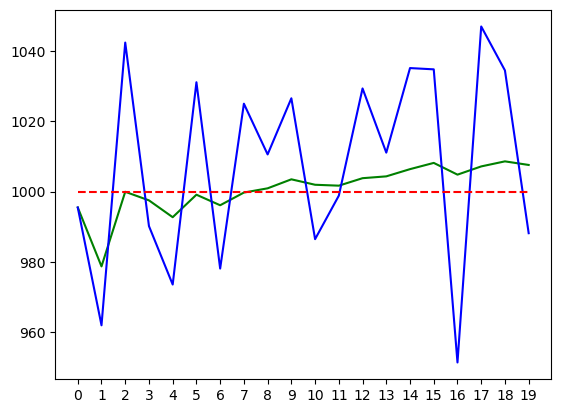

In [10]:
plt.plot(range(len(measurements)),filter.get_predictions()[1:],"g-", measurements,"b-",[weight]*measurement_no,"r--")
plt.xticks(range(len(measurements)))
plt.show()